# Esercitazione 9

In questa esercitazione vogliamo costruire un Algoritmo Genetico basato su operatori di selezione, mutazione e crossing per andare a risolvere il problema del Commesso Viaggiatore.

## Il problema del Commesso Viaggiatore

Il problema del commesso viaggiatore, spesso abbreviato TSP, e' un esempio di problema di ottimizzazione combinatorio dove la la soluzione ottimale deve essere trovata tra un set finito di soluzioni. \
Nel TSP, consideriamo n citta' distribuite casualmente, o secondo certi vincoli, nello spazio. Il nostro obiettivo di ottimizzazione e' trovare il percorso piu' corto possibile che collega tutte le citta', visitando ciascuna una sola volta, e torna al punto di partenza.

Consideriamo una sequenza di interi non ripetuta che rappresenta le nostre citta' $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$ che va dalla prima alla N-esima citta'. Il problema di ottimizzazione verte intorno la ricerca del cammino che minimizza la distanza in $L^{(2)}$ ossia 

$$L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2$$

Questa rappresenta la funzione Costo che vorremo minimizzare. \
Data l'esistenza di un numero finito di possibili percorsi, questo e' un problema di ottimizzazione combinatoria, nonostante possa essere un problema con un pool enorme di soluzioni possibili. Nel nostro caso, infatti, in cui avremo a che fare con 34 citta', il pool e' di circa $10^{36}$ !


## Algoritmo Genetico

Gli algoritmi genetici sono una classe di algoritmi per la risoluzione di problemi di ottimizzazione basati sui meccanismi della selezione naturale e della genetica. L'evoluzione naturale, infatti, e' a tutti gli effetti un metodo di ricerca di soluzioni all'interno di un numero enorme di possibilita' e, al contempo, un meccanismo per costruire soluzioni innovative a problemi complessi. Le buone soluzioni, cioe' quelle con alta possibilita' di sopravvivenza, saranno da noi identificate come quelle che minimizzano la funzione Costo, e che quindi massimizzano una funzione Fitness; la funzione Costo entra quindi nella valutazione della qualita' degli individui.

Le fondamenta della evoluzione sono staordinariamente semplici: le specie evolvono attraverso variazioni casuali, esse siano mutazioni o incroci, a cui segue una selezione naturale in cui i migliori tendono a sopravvivere, portando cosi' avanti il loro materiale genetico alle future generazioni.


Per andare a formalizzare il nostro problema del TSP attraverso "gli occhi" di un algoritmo genetico, possiamo utilizzare una rappresentazione 1D dei cammini. Possiamo pensare, percio', che una possibile soluzione del problema sia un array di 34 interi tutti diversi tra loro, in cui ogni elemento rappresenta una citta'.

$$\left[ 1, 3, 5, 4, 2, ... \right]$$ 

Questo array rappresenta un possibile cromosoma, i suoi particolari elementi, cioe' le citta', sono i geni e un insieme di molti cromosomi rappresenta la popolazione che andremo a incrociare e mutare. Ogni cromosoma dovra' avere tutti i numeri da 1 a 34, ognuno una sola volta; l'ordine rappresenta l'ordine in cui il commesso visitera' le citta'.\
L'unico vincolo che poniamo sull'ordine delle citta' e' che per tutti i cromosomi la prima citta' dovra' essere sempre la stessa: in questo modo la degenerazione per il cammino piu' corto e' ridotta a due corrispondente allo stesso cammino percorso in senso orario o antiorario. Per implementare questa importante accortezza, costruiamo una funzione di check che controlla che il primo gene sia sempre lo stesso e che il cromosoma abbia tutte le citta' e che nessuna si ripeta.

Per implementare la **selezione naturale** costruiamo un operatore di selezione che sceglie quali cromosomi si potranno riprodurre all'interno della nostra popolazione: la scelta, pero', non e' totalmente casuale ma guidata verso i cromosomi che meglio fittano, minimizzano, la funzione costo: i piu' fit avranno piu' probabilita' di essere selezionati per la riproduzione. Nel codice, l'algoritmo di selezione agira' sulla popolazione di cromosomi ordinata scegliendo il j-esimo individuo secondo $j=int(M\times r^p)$ dove M e' il numero di cromosomi, r un numero casuale estratto in $[0,1)$ e p un fattore da tunare: per andare a prendere i cromosomi a fitness maggiore nel vettore popolazione ordinato per fitness crescente, noi lo abbiamo posto pari a 0.1 .

Una volta selezionati i cromosomi genitori, attraverso l'operazione di **crossover** i cromosomi si combinano scambiandosi una parte del loro patrimonio genetico, individuata da un cross-site scelto randomicamente, e ricombinandosi per dara alla luce dui cromosomi figli. \
Nel codice implementiamo un operatore che sceglie una posizione a caso nei due cromosomi selezionati ed effettua un taglio: la prima parte viene conservata e forma la prima parte dei due cromosomi figli che vengono poi completati aggiungendo le citta' mancanti nell'ordine in cui compaiono nell'altro genitore. \
Questo processo di selezione-ricombinazioni viene effettuato fin quando la nuova popolazione ha lo stesso numero di individui della originale. \
Questa operazione di crossover e' una mossa altamente locale nello spazio delle soluzioni: e', percio', l'unica operazione che permette di esplorare molto ricercando le soluzioni migliori.

Ora i figli vanno incontro a **mutazioni** che randomicamente cambiano la posizione di alcuni geni all'interno dello stesso cromosoma. Le mutazioni aggiungono diversita' aiutando la popolazione a non bloccarsi in un minimo locale.\
Abbiamo implementato quattro diversi operatori di mutazione tenendo sempre in mente, pero', che tutti i cromosomi devono avere lo stesso primo gene e tutti gli interi fino 34 devono apparire una sola volta:
1. swap di citta': swappiamo tra di loro due geni;
2. shift di n posizioni per citta' continue: ruotiamo il secondo gene di n posizioni e ripetiamo fino ad aver ruotato n geni;
3. permutazione di m citta' col altre m citta': sostanzialmente uno swap a blocchi;
4. inversione di m citta': invertiamo l'ordine in cui appaiono le citta' all'interno di un blocco lungo m geni.

Sia le mutazioni che il crossover devono avvenire solo con una certa probabilita': il crossover ci permette di esplorare lo spazio delle soluzioni percio' deve avere probabilita' di avvenimento tendenzialmente alta, mentre le mutazioni, per quanto aiutino la popolazione a non stagnare, distruggono le vecchie soluzioni quindi man mano che convergiamo a buoni cromosomi potrebbero essere deleterie; da cio' la probabilita' di mutazione sara' abbastanza bassa. \
Nella nostra simulazione abbiamo posto:
- Probabilita' di cross-over = 0.7;
- Probabilita' di Mutazione = 0.05. 

In particolare, quella di mutazione e' significativamente bassa dato che sui due figli applichiamo tutte e 4 le mutazioni.

Per rendere il codice piu' comprensibile e facilmente gestibile abbiamo creato una classe citta' con le posizioni in $R^2$ delle 34 citta'; un vettore di citta', county, per permettere il calcolo del fitness di un cromosoma calcolando l'inverso della lunghezza totale del cammino codificato dai suoi geni; e una classe genetica che implementa le mutazioni e l'operatore di crossover. Il main, invece, gestisce l'inizializzazione del problema e l'evoluzione della popolazione generazione per generazione.

### Citta' su Circonferenza

Innanzitutto utilizziamo il nostro algoritmo genetico per trovare la soluzione del TSP nel caso in cui le 34 citta'si trovino posizionate su di una circonferenza. Essendo la soluzione nota, proprio il percorrere la circonferenza dal punto di partenza in senso orario o anti, possiamo utilizzare questo caso per andare a verificare il corretto funzionamento del nostro algoritmo genetico.

Utilizziamo una popolazione di 500 cromosomi che evolve per 300 generazioni. Plottiamo, di seguito, l'andamento della funzione costo, norma in $L^{(2)}$, del miglior cammino generazione per generazione e l'andamento di $\langle L^{(2)}\rangle$ mediato sulla meta' migliore della popolazione, anch'esso in funzione della generazione. 

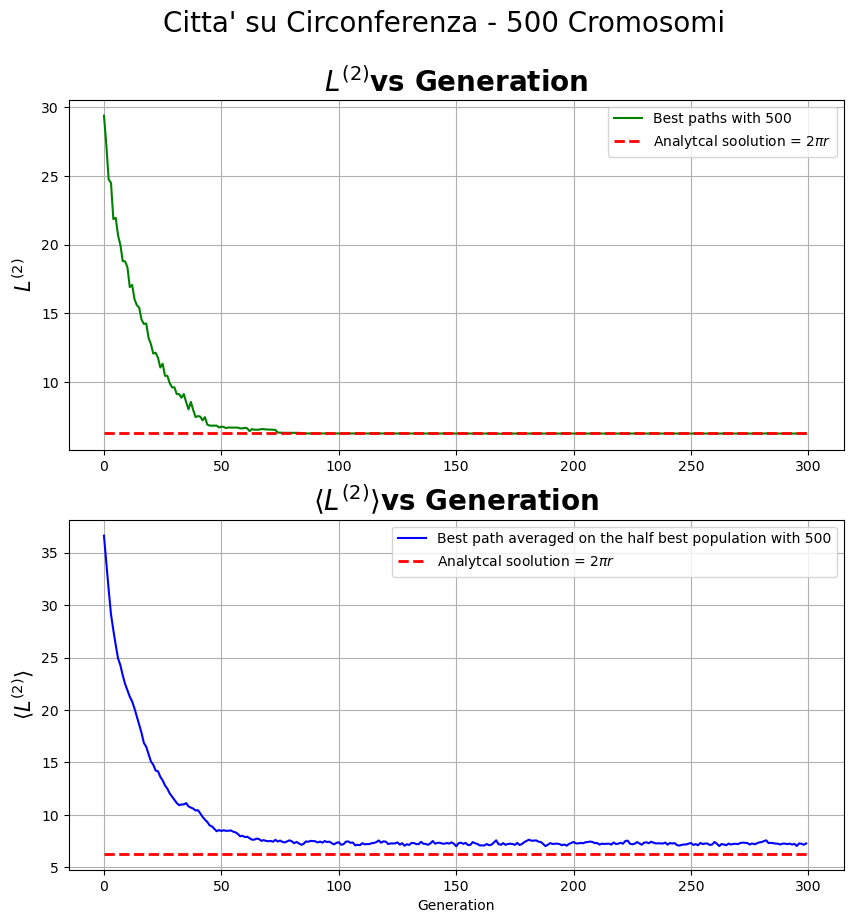

In [132]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


plt.figure(figsize=(10,10)) #oppure 10,6
chromosomes = ["500", "2000", "4000" ]
label = ["Best paths", "Best path averaged on the half best population"]
colors = ['green', 'blue']
files_name = ["distance", "average_distance"] 
y_labels = [r"$L^{(2)}$", r"$\langle L^{(2)}\rangle$"]
for i in range (2) :
    generation, value = np.loadtxt("es9/"+chromosomes[0] + "/circle_" + files_name[i]+ "_results.out", 
                  usecols=(0, 1), unpack=True, delimiter=' ')
    plt.subplot(2, 1, i+1)
    plt.plot(generation, value, label =label[i] + " with " + chromosomes[0], color=colors[i])
    plt.hlines(2*np.pi, 0, 300, colors='r', linestyles='dashed', linewidth =2, 
           label = r"Analytical soolution = $2\pi r$")
    plt.grid(True)
    if(i==1):
            plt.xlabel("Generation", fontsize=10)
    plt.ylabel(y_labels[i], fontsize=15)
    plt.title(y_labels[i] + "vs Generation", fontweight='bold', fontsize = 20)
    plt.legend(fontsize="10")
    
plt.suptitle("Citta' su Circonferenza - 500 Cromosomi", fontsize=20, y=0.97)
plt.show()

Possiamo osservare come il valore della lunghezza del miglior cammino possibile converge, giustamente, al perimetro della circonferenza, essendo questa la soluzione esatta, mentre eseguendo la media sulla migliore meta' popolazione la funzione costo rimane abbastanza lontana dal valore corretto, oscillando intorno a 7.2. \
Indaghiamo, percio', se questo effetto dipenda o meno da parametri del problema come il numero di cromosomi per generazione: effettuiamo una analoga simulazione portando a 2000 il numero di cromosomi totali per ogni generazione.

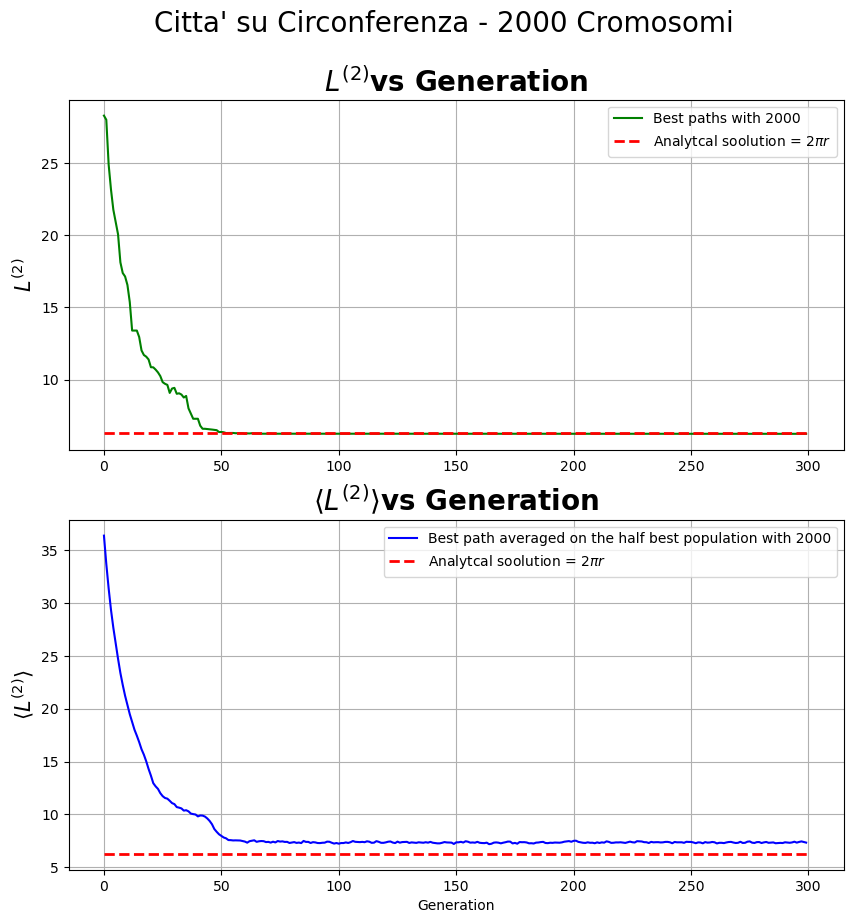

In [133]:
plt.figure(figsize=(10,10))
for j in range (2) :
    generation, value = np.loadtxt("es9/"+chromosomes[1] + "/circle_" + files_name[j]+ "_results.out", 
                  usecols=(0, 1), unpack=True, delimiter=' ')
    plt.subplot(2, 1, j+1)
    plt.plot(generation, value, label =label[j] + " with " + chromosomes[1], color=colors[j])
    plt.hlines(2*np.pi, 0, 300, colors='r', linestyles='dashed', linewidth =2, 
           label = r"Analytical soolution = $2\pi r$")
    plt.grid(True)
    if(j==1):
            plt.xlabel("Generation", fontsize=10)
    plt.ylabel(y_labels[j], fontsize=15)
    plt.title(y_labels[j] + "vs Generation", fontweight='bold', fontsize = 20)
    plt.legend(fontsize="10")
    
plt.suptitle("Citta' su Circonferenza - 2000 Cromosomi", fontsize=20, y=0.97)
plt.show()

Possiamo vedere come la funzione costo presenti lo stesso andamento che nel caso di 500 cromosomi andando a convergere al valore esatto nel caso di miglior cromosoma in funzione della generazione, ma mantenendosi lontana se eseguiamo la media sulla meta' migliore di popolazione. Possiamo dedurre, quindi, che questa deviazione non sia dipendente dal numero di cromosomi utilizzati, ma piuttosto dal fatto stesso di mediare su una popolazione ampia in cui si potrebbero ancora trovare individui non ottimali.

Osserviamo, ora, il migliore cammino possibile nei due casi in coordinate cartesiane: vediamo, percio', il "vero" cammino che il nostro commesso dovrebbe seguire per minimizzare la distanza percorsa visitando tutte le citta' una sola volta e tornando nella sua citta' di origine.

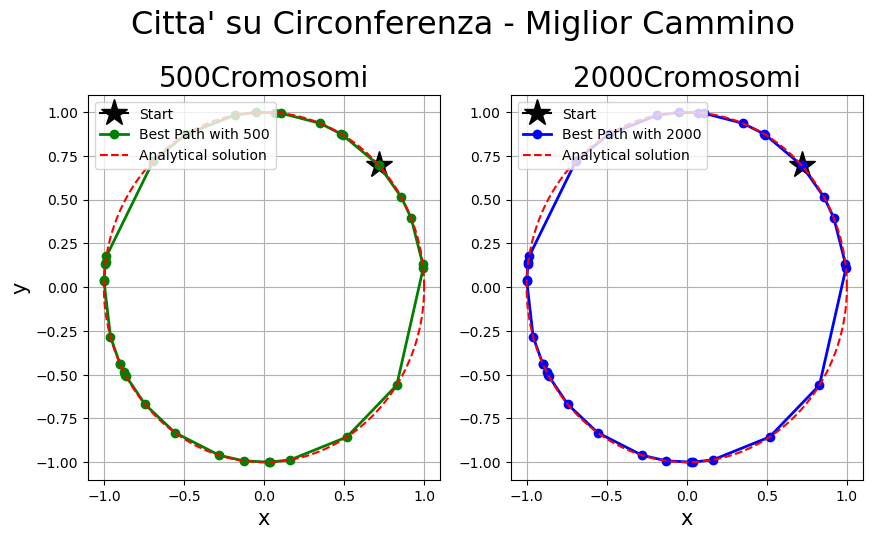

In [134]:
angle=np.linspace( 0 , 2 * np.pi , 150 ) 
x_circle=np.cos( angle ) 
y_circle=np.sin( angle ) 

plt.figure(figsize=(10,5))
for k in range (2) :
    x, y = np.loadtxt("es9/"+chromosomes[k] + "/circle_cartesian_path_results.out", 
                  usecols=(0, 1), unpack=True, delimiter=' ')
    plt.subplot(1, 2, k+1)
    plt.plot(x[0],y[0], marker ="*", color = "black", markersize = 20, label = "Start")
    plt.plot(x, y, label ="Best Path with " + chromosomes[k], color=colors[k], marker ='o', linewidth = 2)
    plt.plot(x_circle, y_circle, label = "Analytical solution", color = 'red', linestyle='dashed')
    plt.grid(True)
    plt.xlabel("x", fontsize=15)
    if(k==0) :
        plt.ylabel("y", fontsize=15)
    plt.title(chromosomes[k] + "Cromosomi", fontsize = 20)
    plt.legend(fontsize="10", loc ='upper left')
    
plt.suptitle("Citta' su Circonferenza - Miglior Cammino", fontsize=23, y=1.05)
plt.show()

Possiamo osservare come la soluzione da noi trovata si avvicini bene alla soluzione analitica tranne per i due segmenti ad ambo i lati della ciconferenza. Ovviamente le soluzioni sono identiche nei due casi dato che la disposizione delle citta' e' la medesima visto che per "posizionarle" abbiamo utilizzato il generatore di numeri pseudo-casuali impostato sullo stesso seed. \
Piuttosto che cambiare il seed del generatore nei due casi, dato che gia' conosciamo la soluzione analitica, abbiamo preferito svolgere la simulazione in questo modo per verificare che il migliore percorso ottenuto non cambiasse all'aumentare del numero di cromosomi utilizzato.

## Citta' nel Quadrato

Ora che abbiamo verificato che il nostro algoritmo genetico funziona e converge ai migliori cromosomi, possiamo utilizzarlo per andare ad affrontare un problema piu' complicato: anziche' posizionare le citta' sulla circonferenza, poniamo le 34 citta' all'interno di un quadrato di lato 1. \
A differenza del precedente caso non abbiamo una soluzione analitica a cui sappiamo dover tendere. \
Percio', per una analisi approondita, studiamo sia il caso con 500 cromosomi sia con 2000 che evolvono, ancora, per 300 generazioni. 

Come nel caso precedente plottiamo $L^{(2)}$ per il migliore cammino ad ogni generazione e $\langle L^{(2)}\rangle$ mediato sulla meta' migliore della popolazione in funzione della generazione.

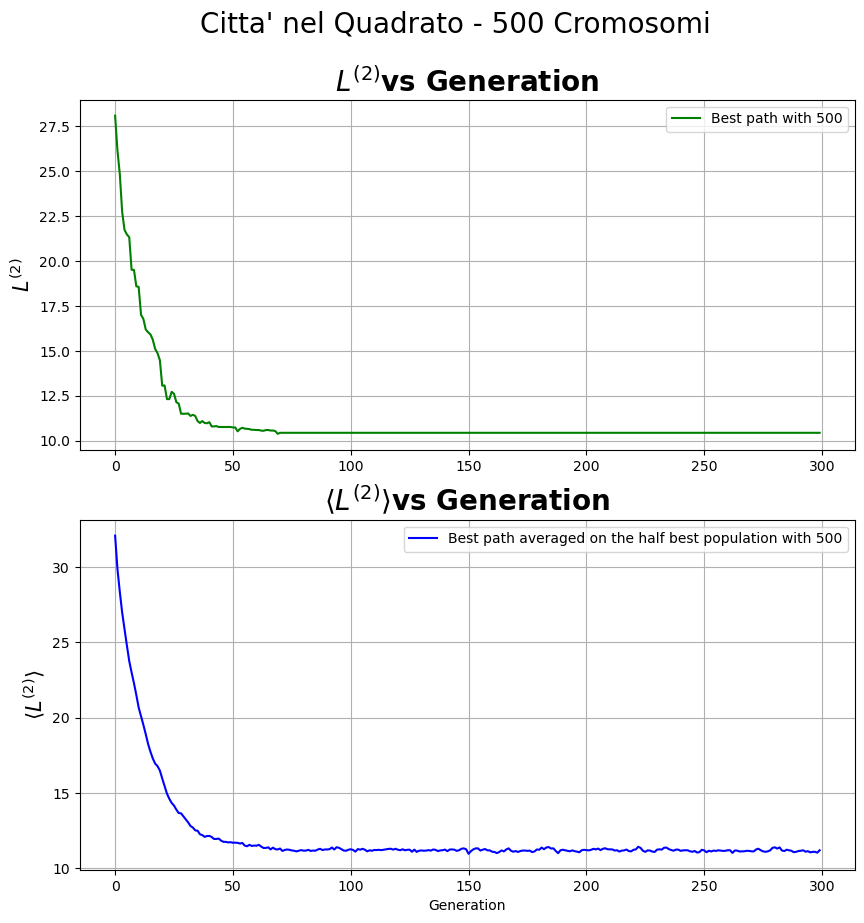

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


plt.figure(figsize=(10,10)) #oppure 10,6
chromosomes = ["500", "2000" ]
label = ["Best path", "Best path averaged on the half best population"]
colors = ['green', 'blue']
files_name = ["distance", "average_distance"] 
y_labels = [r"$L^{(2)}$", r"$\langle L^{(2)}\rangle$"]
for i in range (2) :
    generation, value = np.loadtxt("es9/"+chromosomes[0] + "/square_" + files_name[i]+ "_results.out", 
                  usecols=(0, 1), unpack=True, delimiter=' ')
    plt.subplot(2, 1, i+1)
    plt.plot(generation, value, label =label[i] + " with " + chromosomes[0], color=colors[i])
    plt.grid(True)
    if(i==1):
            plt.xlabel("Generation", fontsize=10)
    plt.ylabel(y_labels[i], fontsize=15)
    plt.title(y_labels[i] + "vs Generation", fontweight='bold', fontsize = 20)
    plt.legend(fontsize="10")
    
plt.suptitle("Citta' nel Quadrato - 500 Cromosomi", fontsize=20, y=0.97)
plt.show()

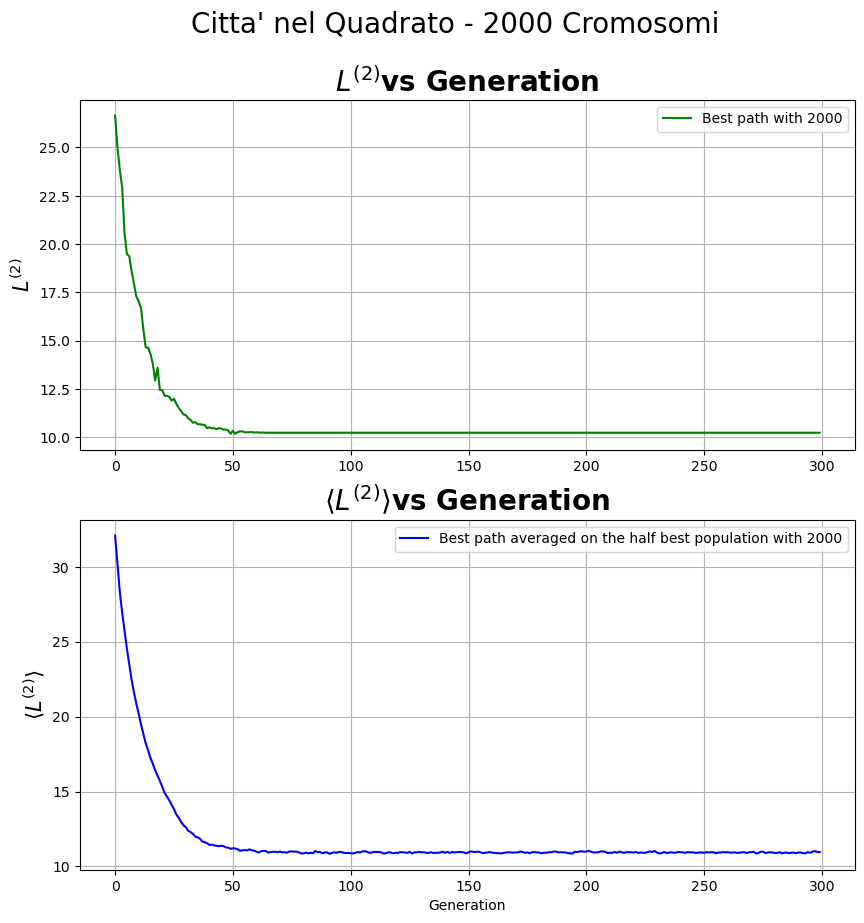

In [2]:
plt.figure(figsize=(10,10))
for i in range (2) :
    generation, value = np.loadtxt("es9/"+chromosomes[1] + "/square_" + files_name[i]+ "_results.out", 
                  usecols=(0, 1), unpack=True, delimiter=' ')
    plt.subplot(2, 1, i+1)
    plt.plot(generation, value, label =label[i] + " with " + chromosomes[1], color=colors[i])
    plt.grid(True)
    if(i==1):
            plt.xlabel("Generation", fontsize=10)
    plt.ylabel(y_labels[i], fontsize=15)
    plt.title(y_labels[i] + "vs Generation", fontweight='bold', fontsize = 20)
    plt.legend(fontsize="10")
    
plt.suptitle("Citta' nel Quadrato - 2000 Cromosomi", fontsize=20, y=0.97)
plt.show()

Come nel caso delle citta' sulla circonferenza, osserviamo che il valore della funzione costo del miglior cromosoma ad ogni generazione converge e si stabilizza verso un valore costante; mentre mediando sulla meta' migliore della popolazione, otteniamo un risultato oscillante che tende ad un valore maggiore. \
In questo caso, pero', non possiamo confrontare i risultati ottenuti con un cammino analitico e affermare che la funzione costo raggiunge il suo minimo assoluto. Nonostante questo, possiamo evidenziare come la funzione costo del migliore cromosoma in funzione della generazione nel caso di 500 cromosomi si stabilizzi intorno 10.43, mentre nel caso di 2000 cromosomi 10.22: ci aspettiamo, percio', che i due percorsi migliori siano diversi nei due casi e che il piu' corto tra i due, dunque il migliore da noi trovato, sia quello ottenuto per 2000 cromosomi.

Analizziamo, ora, l'andamento del miglior cammino possibile all'interno del quadrato in coordinate cartesiane.

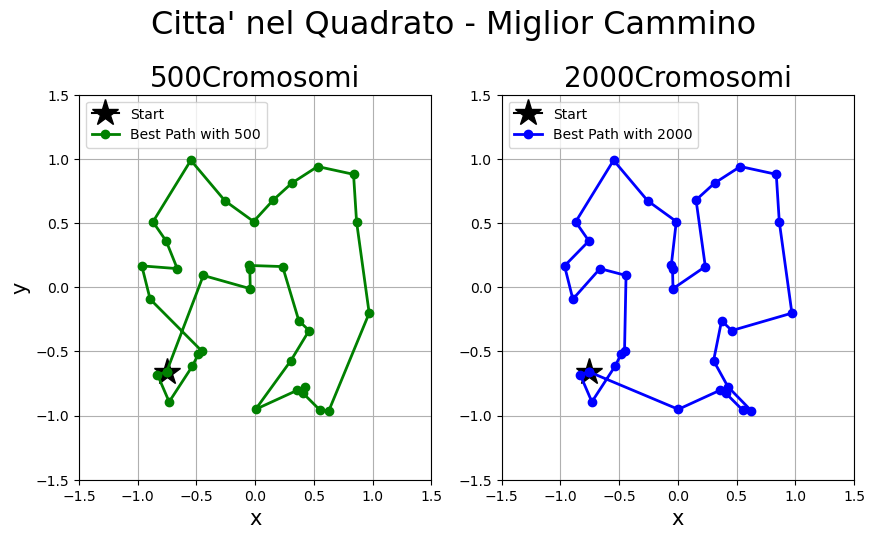

In [137]:
plt.figure(figsize=(10,5))
for a in range (2) :
    x, y = np.loadtxt("es9/"+chromosomes[a] + "/square_cartesian_path_results.out", 
                  usecols=(0, 1), unpack=True, delimiter=' ')
    plt.subplot(1, 2, a+1)
    plt.plot(x[0],y[0], marker ="*", color = "black", markersize = 20, label = "Start")
    plt.plot(x, y, label ="Best Path with " + chromosomes[a], color=colors[a], marker ='o', linewidth = 2)
    plt.grid(True)
    plt.xlabel("x", fontsize=15)
    if(a==0) :
        plt.ylabel("y", fontsize=15)
    plt.title(chromosomes[a] + "Cromosomi", fontsize = 20)
    plt.legend(fontsize="10", loc ='upper left')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    
plt.suptitle("Citta' nel Quadrato - Miglior Cammino", fontsize=23, y=1.05)
plt.show()

Come ci aspettavamo i percorsi sono diversi e, dai dati ottenuti nei plot precedenti, possiamo affermare che il percorso per 2000 cromosomi sia il miglior tragitto ottenuto dato che e' quello per cui la funzione costo, distanza in $L^{(2)}$, raggiunge il piu' piccolo valore tra tutti i valori da noi trovati. Questo, sfortunatamente, pero' non vuol dire che tale percorso coincide col minimo assoluto della distanza. 

Nonostante cio', ci riteniamo soddisfatti dal risultato di questa esercitazione e ci proponiamo di analizzare l'eventuale raggiungimento di un risultato migliore nella prossima esecitazione, dove potremo sfruttare il calcolo in parallelo.